In [611]:
# import packages
# numpy, pandas, scipy, math, matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# scaler
from sklearn.preprocessing import MinMaxScaler

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# cross validation
from sklearn.model_selection import train_test_split

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [612]:
# import data
existing = pd.read_csv('existingProductAttributes.csv')
existing.head()

,Product Type,Product #,Price,5 Star Reviews,4 Star Reviews,3 Star Reviews,2 Star Reviews,1 Star Reviews,Positive Service Review,Negative Service Review,Would consumer recommend product,Best Sellers Rank,Shipping Weight (lbs),Product Depth,Product Width,Product Height,Profit margin,Volume
0,PC,101,949.00,3,3,2,0,0,2,0,0.9,1967.0,25.8,23.94,6.62,16.89,0.15,12
1,PC,102,2249.99,2,1,0,0,0,1,0,0.9,4806.0,50.0,35.00,31.75,19.00,0.25,8
2,PC,103,399.00,3,0,0,0,0,1,0,0.9,12076.0,17.4,10.50,8.30,10.20,0.08,12
3,Laptop,104,409.99,49,19,8,3,9,7,8,0.8,109.0,5.7,15.00,9.90,1.30,0.08,196
4,Laptop,105,1079.99,58,31,11,7,36,7,20,0.7,268.0,7.0,12.90,0.30,8.90,0.09,232


In [613]:
# remove unnecessary columns
existing = existing.drop(columns=['Product #','Best Sellers Rank','Shipping Weight (lbs)', 'Product Depth', 
                                  'Product Width', 'Product Height', 'Profit margin', 'Product Type'])
# rename columns
existing = existing.rename({'5 Star Reviews': 'x5StarReviews',
                            '4 Star Reviews': 'x4StarReviews',
                            '3 Star Reviews': 'x3StarReviews',
                            '2 Star Reviews': 'x2StarReviews',
                            '1 Star Reviews': 'x1StarReviews',
                            'Positive Service Review': 'PosServiceReview',
                            'Negative Service Review': 'NegServiceReview',
                            'Would consumer recommend product': 'WouldRecommend'}, axis='columns')
existing.head()

,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PosServiceReview,NegServiceReview,WouldRecommend,Volume
0,949.00,3,3,2,0,0,2,0,0.9,12
1,2249.99,2,1,0,0,0,1,0,0.9,8
2,399.00,3,0,0,0,0,1,0,0.9,12
3,409.99,49,19,8,3,9,7,8,0.8,196
4,1079.99,58,31,11,7,36,7,20,0.7,232


In [614]:
# find and remove any duplicate rows
# check for duplicate rows
existing.duplicated().sum()
# create list of duplicate rows
duplicateRowsDF = existing[existing.duplicated()]
print(duplicateRowsDF)
# drop duplicates
existing = existing.drop_duplicates()
existing.duplicated().sum()

Empty DataFrame
Columns: [Price, x5StarReviews, x4StarReviews, x3StarReviews, x2StarReviews, x1StarReviews, PosServiceReview, NegServiceReview, WouldRecommend, Volume]
Index: []


0

In [615]:
# search for missing values
existing.isnull().values.any()
# count missing values for each feature
existing.isnull().sum()

Price               0
x5StarReviews       0
x4StarReviews       0
x3StarReviews       0
x2StarReviews       0
x1StarReviews       0
PosServiceReview    0
NegServiceReview    0
WouldRecommend      0
Volume              0
dtype: int64

In [616]:
# get to know the data
existing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 10 columns):
Price               80 non-null float64
x5StarReviews       80 non-null int64
x4StarReviews       80 non-null int64
x3StarReviews       80 non-null int64
x2StarReviews       80 non-null int64
x1StarReviews       80 non-null int64
PosServiceReview    80 non-null int64
NegServiceReview    80 non-null int64
WouldRecommend      80 non-null float64
Volume              80 non-null int64
dtypes: float64(2), int64(8)
memory usage: 6.9 KB


In [617]:
existing.describe()

,Price,x5StarReviews,x4StarReviews,x3StarReviews,x2StarReviews,x1StarReviews,PosServiceReview,NegServiceReview,WouldRecommend,Volume
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,247.251125,176.250000,40.200000,14.787500,13.787500,37.675000,51.750000,6.225000,0.745000,705.000000
std,339.574925,379.193698,70.741891,30.963717,45.924455,186.718483,104.471606,14.304974,0.197388,1516.774793
min,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,52.665000,10.000000,2.750000,2.000000,1.000000,2.000000,2.000000,1.000000,0.700000,40.000000
50%,132.720000,50.000000,22.000000,7.000000,3.000000,8.500000,5.500000,3.000000,0.800000,200.000000
75%,352.490000,306.500000,33.000000,11.250000,7.000000,15.250000,42.000000,6.250000,0.900000,1226.000000
max,2249.990000,2801.000000,431.000000,162.000000,370.000000,1654.000000,536.000000,112.000000,1.000000,11204.000000


In [618]:
# look at correlation coefficient matrix
corrMat = existing.corr()
s = corrMat.unstack()
so = s.sort_values(kind="quicksort")
pd.set_option('display.max_rows', 200)
s = corrMat.unstack()
so = s.sort_values(ascending=False)
so

Volume            Volume              1.000000
WouldRecommend    WouldRecommend      1.000000
x5StarReviews     x5StarReviews       1.000000
                  Volume              1.000000
x4StarReviews     x4StarReviews       1.000000
x3StarReviews     x3StarReviews       1.000000
x2StarReviews     x2StarReviews       1.000000
x1StarReviews     x1StarReviews       1.000000
PosServiceReview  PosServiceReview    1.000000
NegServiceReview  NegServiceReview    1.000000
Price             Price               1.000000
Volume            x5StarReviews       1.000000
x2StarReviews     x1StarReviews       0.951913
x1StarReviews     x2StarReviews       0.951913
x3StarReviews     x4StarReviews       0.937214
x4StarReviews     x3StarReviews       0.937214
x1StarReviews     NegServiceReview    0.884728
NegServiceReview  x1StarReviews       0.884728
x4StarReviews     Volume              0.879006
Volume            x4StarReviews       0.879006
x4StarReviews     x5StarReviews       0.879006
x5StarReviews

High correlation (>.95) with dependent variable (Volume) = x5StarReviews

High correlation (>.90) between independent variables = x2StarReviews, x1StarReviews; x4StarReviews, x3StarReviews

In [619]:
# remove highly correlated variables
existing = existing.drop(columns=['x5StarReviews','x2StarReviews', 'x3StarReviews'])
existing.head()

,Price,x4StarReviews,x1StarReviews,PosServiceReview,NegServiceReview,WouldRecommend,Volume
0,949.00,3,0,2,0,0.9,12
1,2249.99,1,0,1,0,0.9,8
2,399.00,0,0,1,0,0.9,12
3,409.99,19,9,7,8,0.8,196
4,1079.99,31,36,7,20,0.7,232


In [620]:
existing.describe()

,Price,x4StarReviews,x1StarReviews,PosServiceReview,NegServiceReview,WouldRecommend,Volume
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,247.251125,40.200000,37.675000,51.750000,6.225000,0.745000,705.000000
std,339.574925,70.741891,186.718483,104.471606,14.304974,0.197388,1516.774793
min,3.600000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,52.665000,2.750000,2.000000,2.000000,1.000000,0.700000,40.000000
50%,132.720000,22.000000,8.500000,5.500000,3.000000,0.800000,200.000000
75%,352.490000,33.000000,15.250000,42.000000,6.250000,0.900000,1226.000000
max,2249.990000,431.000000,1654.000000,536.000000,112.000000,1.000000,11204.000000


In [621]:
# remove outliers for 1 star review: IQR method
quartile_1, quartile_3 = np.percentile(existing.x1StarReviews, [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
existingnew = existing.drop(existing[existing.x1StarReviews <= lower_bound].index)
existingnew = existing.drop(existing[existing.x1StarReviews >= upper_bound].index)
existingnew.describe()

,Price,x4StarReviews,x1StarReviews,PosServiceReview,NegServiceReview,WouldRecommend,Volume
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,253.221714,21.485714,8.100000,44.628571,2.928571,0.754286,406.914286
std,344.316295,25.401554,7.598913,93.672289,3.098955,0.194628,527.951215
min,3.600000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,54.537500,2.000000,2.000000,1.250000,1.000000,0.700000,32.000000
50%,138.465000,14.500000,6.000000,5.000000,2.000000,0.800000,96.000000
75%,374.990000,27.750000,15.000000,12.750000,4.000000,0.900000,640.000000
max,2249.990000,118.000000,29.000000,310.000000,13.000000,1.000000,1896.000000


############################################

REPEAT PROCESS ON NEW PRODUCT DATA

In [622]:
# import data
newproductsorig = pd.read_csv('newProductAttributes.csv')
newproducts = newproductsorig.copy()
newproducts.head()

,Product Type,Product #,Price,5 Star Reviews,4 Star Reviews,3 Star Reviews,2 Star Reviews,1 Star Reviews,Positive Service Review,Negative Service Review,Would consumer recommend product,Best Sellers Rank,Shipping Weight (lbs),Product Depth,Product Width,Product Height,Profit margin,Volume
0,PC,171,699.0,96,26,14,14,25,12,3,0.7,2498,19.9,20.63,19.25,8.39,0.25,0
1,PC,172,860.0,51,11,10,10,21,7,5,0.6,490,27.0,21.89,27.01,9.13,0.20,0
2,Laptop,173,1199.0,74,10,3,3,11,11,5,0.8,111,6.6,8.94,12.80,0.68,0.10,0
3,Laptop,175,1199.0,7,2,1,1,1,2,1,0.6,4446,13.0,16.30,10.80,1.40,0.15,0
4,Laptop,176,1999.0,1,1,1,3,0,0,1,0.3,2820,11.6,16.81,10.90,0.88,0.23,0


In [623]:
# remove unnecessary columns
newproducts = newproducts.drop(columns=['Best Sellers Rank','Shipping Weight (lbs)', 'Product Depth', 
                                        'Product Width', 'Product Height','5 Star Reviews','2 Star Reviews', 
                                        '3 Star Reviews', 'Profit margin', 'Product Type'])
# rename columns
newproducts = newproducts.rename({'1 Star Reviews': 'x1StarReviews',
                                  '4 Star Reviews': 'x4StarReviews',
                                  'Positive Service Review': 'PosServiceReview',
                                  'Negative Service Review': 'NegServiceReview',
                                  'Would consumer recommend product': 'WouldRecommend'}, axis='columns')
newproducts.head()

,Product #,Price,x4StarReviews,x1StarReviews,PosServiceReview,NegServiceReview,WouldRecommend,Volume
0,171,699.0,26,25,12,3,0.7,0
1,172,860.0,11,21,7,5,0.6,0
2,173,1199.0,10,11,11,5,0.8,0
3,175,1199.0,2,1,2,1,0.6,0
4,176,1999.0,1,0,0,1,0.3,0


In [624]:
# find and remove any duplicate rows
# check for duplicate rows
newproducts.duplicated().sum()
# create list of duplicate rows
duplicateRowsDF = newproducts[newproducts.duplicated()]
print(duplicateRowsDF)
# drop duplicates
newproducts = newproducts.drop_duplicates()
newproducts.duplicated().sum()

Empty DataFrame
Columns: [Product #, Price, x4StarReviews, x1StarReviews, PosServiceReview, NegServiceReview, WouldRecommend, Volume]
Index: []


0

In [625]:
newproducts.describe()

,Product #,Price,x4StarReviews,x1StarReviews,PosServiceReview,NegServiceReview,WouldRecommend,Volume
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,184.705882,551.116471,51.235294,34.705882,14.705882,6.823529,0.635294,0.0
std,10.017265,510.967147,104.801914,57.614847,21.888252,6.492643,0.149755,0.0
min,171.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.0
25%,176.000000,199.000000,8.000000,9.000000,2.000000,1.000000,0.600000,0.0
50%,183.000000,330.000000,18.000000,21.000000,7.000000,5.000000,0.700000,0.0
75%,194.000000,699.000000,26.000000,36.000000,14.000000,9.000000,0.700000,0.0
max,201.000000,1999.000000,437.000000,247.000000,90.000000,23.000000,0.800000,0.0


##############################################

MODELS

In [626]:
# define features
X = existingnew.drop(columns=['Volume'])
print('Summary of feature sample')
X.head()

Summary of feature sample


,Price,x4StarReviews,x1StarReviews,PosServiceReview,NegServiceReview,WouldRecommend
0,949.00,3,0,2,0,0.9
1,2249.99,1,0,1,0,0.9
2,399.00,0,0,1,0,0.9
3,409.99,19,9,7,8,0.8
6,379.99,3,1,3,0,0.9


In [627]:
# define dependent variable
y = existingnew['Volume']
y.head()

0     12
1      8
2     12
3    196
6     44
Name: Volume, dtype: int64

In [628]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 123)

In [629]:
# apply scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [630]:
# SVM
modelSVM = SVR()
modelSVM.fit(X_train, y_train)
print('TRAINING')
print('R Squared: %.3f' % modelSVM.score(X_train,y_train))
print('\n')

predictions = modelSVM.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('TESTING')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

TRAINING
R Squared: -0.286


TESTING
R Squared: -0.004
RMSE: 384.883


In [631]:
# random forest
modelRF = RandomForestRegressor(random_state = 123)
modelRF.fit(X_train,y_train)
print('TRAINING')
print('R Squared: %.3f' % modelRF.score(X_train,y_train))
print('\n')

predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('TESTING')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

TRAINING
R Squared: 0.987


TESTING
R Squared: 0.887
RMSE: 129.293


[2.40567980e-02 6.44956573e-02 4.32901790e-03 8.87781383e-01
 1.87984060e-02 5.38738290e-04]


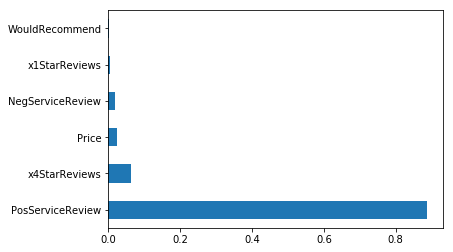

In [632]:
print(modelRF.feature_importances_)
feat_importances = pd.Series(modelRF.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [633]:
# Random Forest RFE
from sklearn.feature_selection import RFE
rfe_rf = RFE(modelRF, 3)
rfe_rf.fit(X_train, y_train)
print('TRAINING')
print('R Squared: %.3f' % rfe_rf.score(X_train,y_train))
print('\n')

predictions = rfe_rf.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('TESTING')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

TRAINING
R Squared: 0.988


TESTING
R Squared: 0.805
RMSE: 169.535


In [634]:
# linear regression
modelLR = LinearRegression()
modelLR.fit(X_train,y_train)
print('TRAINING')
print('R Squared: %.3f' % modelLR.score(X_train,y_train))
print('\n')

predictions = modelLR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('TESTING')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

TRAINING
R Squared: 0.733


TESTING
R Squared: 0.606
RMSE: 240.979


In [635]:
# decision tree
modelDT = DecisionTreeRegressor(random_state = 123)
modelDT.fit(X_train,y_train)
print('TRAINING')
print('R Squared: %.3f' % modelDT.score(X_train,y_train))
print('\n')

predictions = modelDT.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('TESTING')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

TRAINING
R Squared: 1.000


TESTING
R Squared: 0.781
RMSE: 179.867


[2.66061425e-02 5.56822176e-02 7.70808151e-03 8.98257581e-01
 1.16042094e-02 1.41767590e-04]


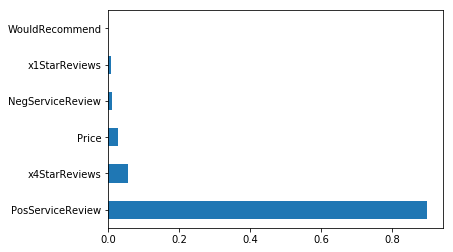

In [636]:
print(modelDT.feature_importances_)
feat_importances = pd.Series(modelDT.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [637]:
# kNN
modelKN = KNeighborsRegressor()
modelKN.fit(X_train,y_train)
print('TRAINING')
print('R Squared: %.3f' % modelKN.score(X_train,y_train))
print('\n')

predictions = modelKN.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('TESTING')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

TRAINING
R Squared: 0.861


TESTING
R Squared: 0.638
RMSE: 231.015


In [638]:
# GBM
modelGBM = GradientBoostingRegressor()
modelGBM.fit(X_train,y_train)
print('TRAINING')
print('R Squared: %.3f' % modelGBM.score(X_train,y_train))
print('\n')

predictions = modelGBM.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('TESTING')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

TRAINING
R Squared: 1.000


TESTING
R Squared: 0.798
RMSE: 172.715


[2.24195168e-02 4.46852647e-02 1.68572584e-03 9.20419932e-01
 1.05187858e-02 2.70774802e-04]


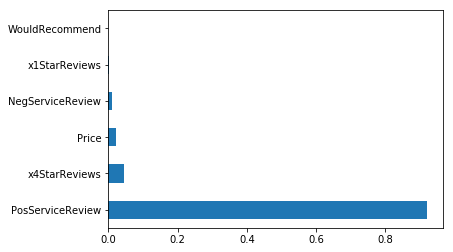

In [639]:
print(modelGBM.feature_importances_)
feat_importances = pd.Series(modelGBM.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##############################################

USE CHOSEN MODEL TO PREDICT VOLUME OF NEW PRODUCTS

In [640]:
# define features
X_new = newproducts.drop(columns=['Volume', 'Product #'])
print('Summary of feature sample')
X_new.head()

Summary of feature sample


,Price,x4StarReviews,x1StarReviews,PosServiceReview,NegServiceReview,WouldRecommend
0,699.0,26,25,12,3,0.7
1,860.0,11,21,7,5,0.6
2,1199.0,10,11,11,5,0.8
3,1199.0,2,1,2,1,0.6
4,1999.0,1,0,0,1,0.3


In [641]:
# apply scaling
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X_new)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [642]:
# use random forest model to make volume predictions for new products
predictions = modelRF.predict(X_new)
print(predictions)

[1184.  1022.8 1134.   128.    10.4  107.2 1155.2  858.8   44.  1111.6
 1008.8 1016.4 1290.8  818.   748.4 1038.8   40. ]


In [643]:
# calculate predicted profit for new products
newproductsorig['Volume'] = predictions
newproductsorig['Profit'] = newproductsorig['Price']*newproductsorig['Profit margin']*newproductsorig['Volume']
newproductsorig.head()

,Product Type,Product #,Price,5 Star Reviews,4 Star Reviews,3 Star Reviews,2 Star Reviews,1 Star Reviews,Positive Service Review,Negative Service Review,Would consumer recommend product,Best Sellers Rank,Shipping Weight (lbs),Product Depth,Product Width,Product Height,Profit margin,Volume,Profit
0,PC,171,699.0,96,26,14,14,25,12,3,0.7,2498,19.9,20.63,19.25,8.39,0.25,1184.0,206904.000
1,PC,172,860.0,51,11,10,10,21,7,5,0.6,490,27.0,21.89,27.01,9.13,0.20,1022.8,175921.600
2,Laptop,173,1199.0,74,10,3,3,11,11,5,0.8,111,6.6,8.94,12.80,0.68,0.10,1134.0,135966.600
3,Laptop,175,1199.0,7,2,1,1,1,2,1,0.6,4446,13.0,16.30,10.80,1.40,0.15,128.0,23020.800
4,Laptop,176,1999.0,1,1,1,3,0,0,1,0.3,2820,11.6,16.81,10.90,0.88,0.23,10.4,4781.608
